In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [13]:
#import data
df = pd.read_csv('production_yield_2021.csv') 
df.head()

,Longitude,Latitude,Field,Dataset,Product,Obj. Id,Swth Wdth(ft),Distance(ft),Duration(s),Track(deg),...,Moisture(%),Crop Flw(M)(lb/s),Speed(mph),Crop Flw(V)(bu/h),Yld Mass(Wet)(lb/ac),Yld Mass(Dry)(lb/ac),Yld Vol(Wet)(bu/ac),Yld Vol(Dry)(bu/ac),Prod(ac/h),Date
0,-93.529750,44.076723,127-134| 227-234,harvest_1_Corn_2021_10_10_000,CORN,1,8.99,4.101,1.0,359.0,...,18.65,0.814,1.920,52.34,962.09,926.22,17.18,16.54,3.047,10/10/2021
1,-93.529750,44.076735,127-134| 227-234,harvest_1_Corn_2021_10_10_000,CORN,2,14.99,4.232,1.0,359.0,...,18.65,1.791,2.030,115.16,1229.70,1183.80,21.96,21.14,5.244,10/10/2021
2,-93.529750,44.076747,127-134| 227-234,harvest_1_Corn_2021_10_10_000,CORN,3,14.99,4.560,1.0,360.0,...,18.65,3.186,2.320,204.80,2029.50,1953.90,36.24,34.89,5.651,10/10/2021
3,-93.529750,44.076759,127-134| 227-234,harvest_1_Corn_2021_10_10_000,CORN,4,14.99,4.298,1.0,358.0,...,18.65,5.140,2.602,330.42,3474.50,3345.00,62.04,59.73,5.326,10/10/2021
4,-93.529751,44.076771,127-134| 227-234,harvest_1_Corn_2021_10_10_000,CORN,5,14.99,4.232,1.0,360.0,...,18.65,8.010,2.732,514.94,5498.60,5293.70,98.19,94.53,5.244,10/10/2021


In [14]:
#create lists of data values from data frame
d_yld_mass = df['Yld Mass(Dry)(lb/ac)']
elev = df['Elevation(ft)']
mo = df['Moisture(%)']

d_mass_elev_cols = df[['Yld Mass(Dry)(lb/ac)', 'Elevation(ft)']]
d_mass_mo_cols = df[['Yld Mass(Dry)(lb/ac)', 'Moisture(%)']]
d_mass_elev_cols

,Yld Mass(Dry)(lb/ac),Elevation(ft)
0,926.22,1143.7
1,1183.80,1143.7
2,1953.90,1143.2
3,3345.00,1143.3
4,5293.70,1143.4
...,...,...
27967,10208.00,1162.1
27968,11561.00,1161.7
27969,10445.00,1161.7
27970,11498.00,1161.8


In [15]:
X_elev = d_mass_elev_cols['Elevation(ft)'].values.reshape(-1, 1)
y_yld_mass = d_mass_elev_cols['Yld Mass(Dry)(lb/ac)']

reg_elev = LinearRegression()
reg_elev.fit(X_elev, y_yld_mass)

LinearRegression()

In [16]:
r2_elev = reg_elev.score(X_elev, y_yld_mass)
r2_elev

0.04738473984706937

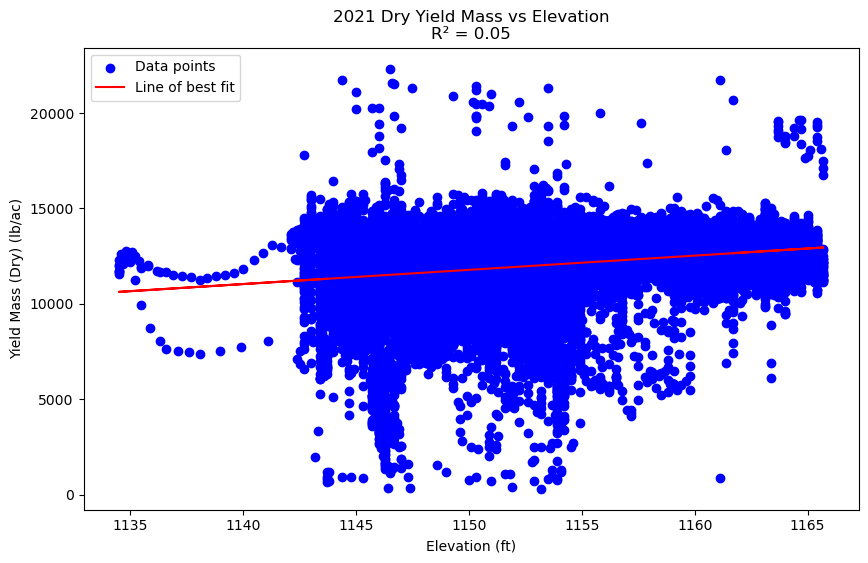

In [17]:
#elevation vs mass line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(X_elev, y_yld_mass, color='blue', label='Data points')
plt.plot(X_elev, reg_elev.predict(X_elev), color='red', label='Line of best fit')
plt.xlabel('Elevation (ft)')
plt.ylabel('Yield Mass (Dry) (lb/ac)')
plt.title(f'2021 Dry Yield Mass vs Elevation\nR² = {r2_elev:.2f}')
plt.legend()
plt.savefig('elev_vs_d_yld_mass_2021.pdf')
plt.show()

In [18]:
X_mo = d_mass_mo_cols['Moisture(%)'].values.reshape(-1, 1)
y_yld_mass = d_mass_mo_cols['Yld Mass(Dry)(lb/ac)']

reg_mo = LinearRegression()
reg_mo.fit(X_mo, y_yld_mass)

LinearRegression()

In [19]:
r2_mo = reg_mo.score(X_mo, y_yld_mass)
r2_mo

0.09598293391694379

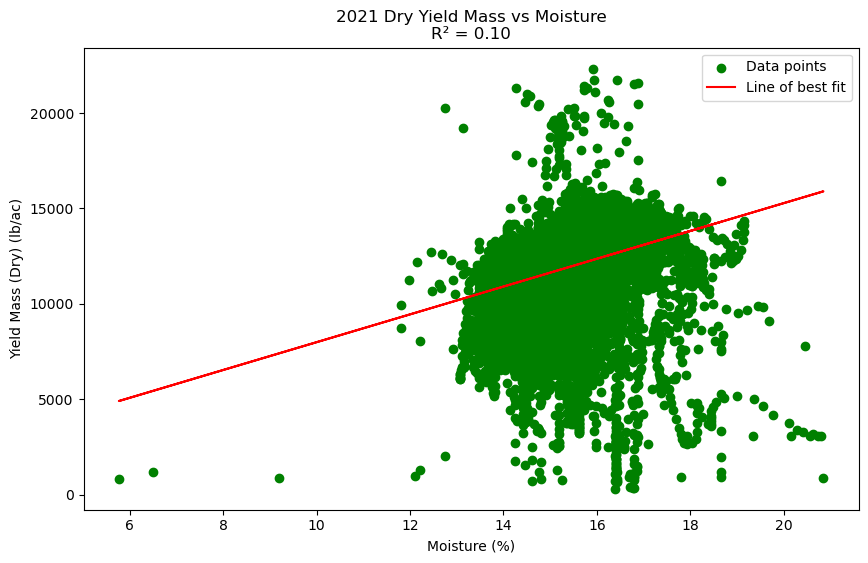

In [21]:
#moisture vs mass line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(X_mo, y_yld_mass, color='green', label='Data points')
plt.plot(X_mo, reg_mo.predict(X_mo), color='red', label='Line of best fit')
plt.xlabel('Moisture (%)')
plt.ylabel('Yield Mass (Dry) (lb/ac)')
plt.title(f'2021 Dry Yield Mass vs Moisture\nR² = {r2_mo:.2f}')
plt.legend()
plt.savefig('mo_vs_d_yld_mass_2021.pdf')
plt.show()